# Alucar - Analisando as vendas

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('alucar.csv').head()

FileNotFoundError: ignored

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
print('Quantidade de linhas e colunas:', alucar.shape)

In [ ]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

In [ ]:
alucar.dtypes

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
print(sns.__version__)

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [ ]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

NameError: ignored

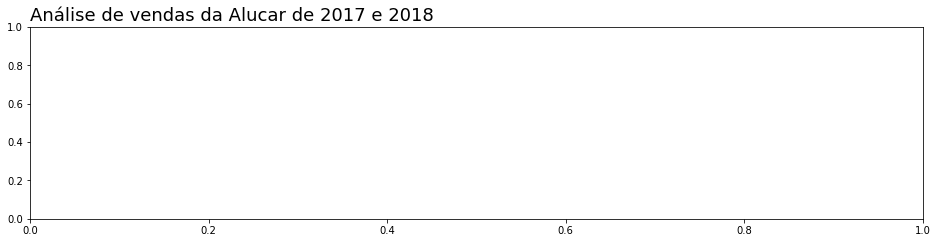

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

NameError: ignored

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

In [ ]:
assinantes.dtypes

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


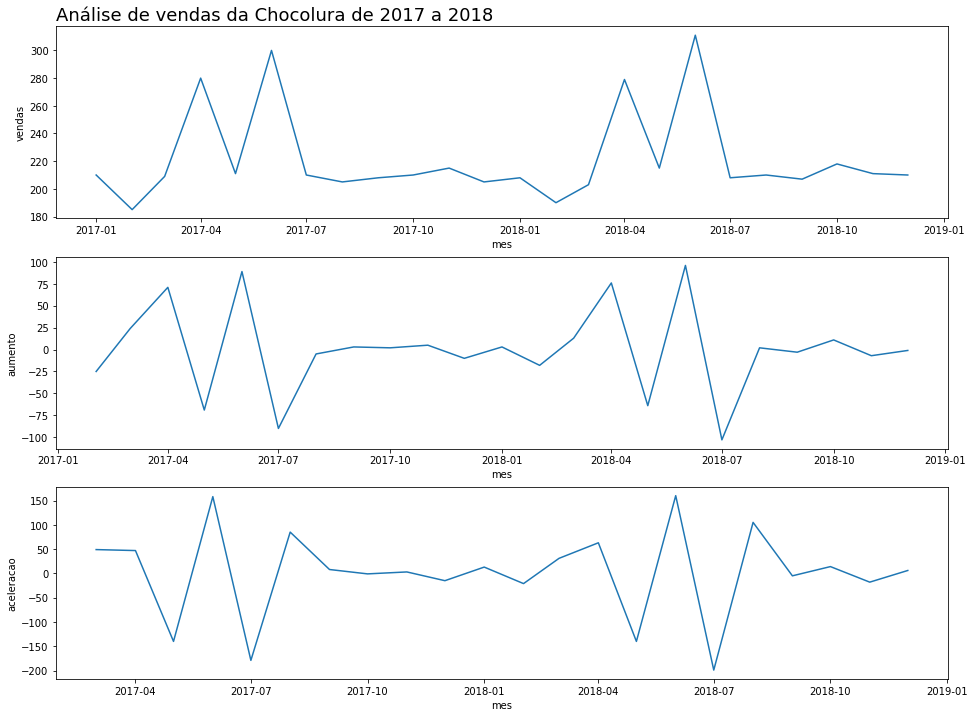

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

FileNotFoundError: ignored

In [ ]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

NameError: ignored

In [ ]:
vendas_por_dia.dtypes

NameError: ignored

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

NameError: ignored

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

NameError: ignored

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday_name

In [ ]:
vendas_por_dia.head(7)

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

In [ ]:
vendas_por_dia.head(14)

**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

In [ ]:
vendas_agrupadas

**Correlação das vendas diárias**

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

In [ ]:
cafelura.dtypes

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
      cafelura)

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

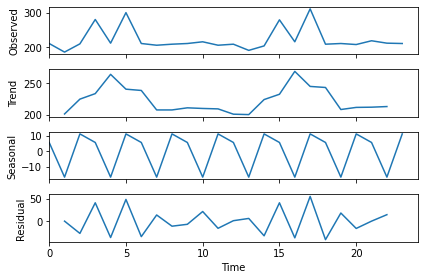

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


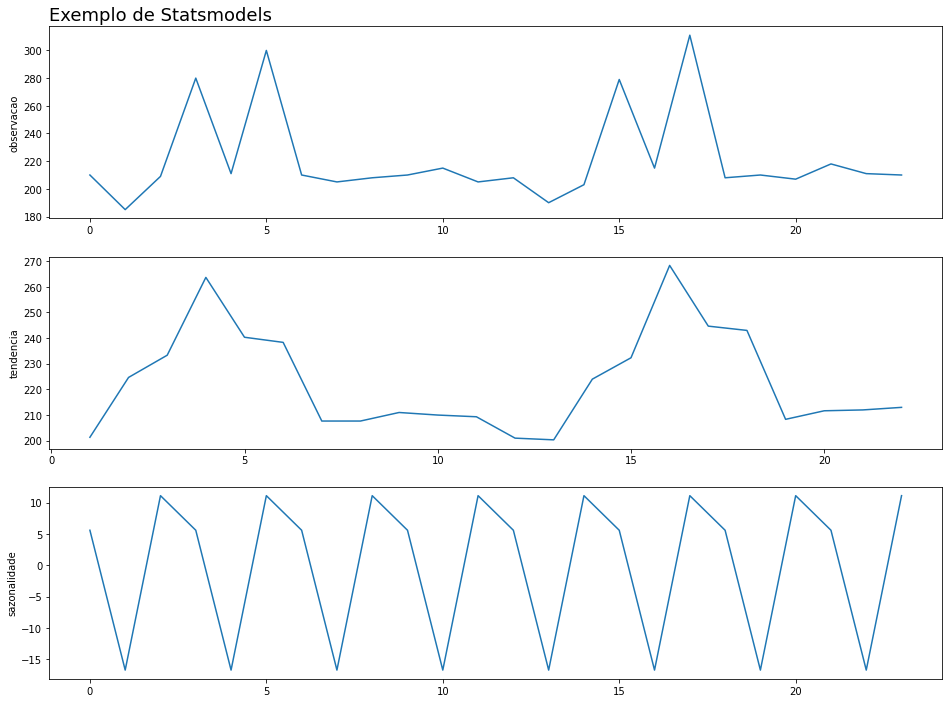

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')